In [1]:
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph, pinta_tikz

In [2]:
%%capture
%mkdir -p ~/temp
%cd ~/temp

## Enunciado

Considere el proyecto cuya información se adjunta.

In [3]:
periodo_probabilidad_a = 10
periodo_probabilidad_b = 12
pregunta_1 = "1. Dibuje los diagramas Pert y Roy, y determine el camino crítico.  "
pregunta_2 = f"2. ¿Cuál será la probabilidad de terminar el proyecto entre {periodo_probabilidad_a} y {periodo_probabilidad_b} periodos. ¿Y la de terminar en 9 periodos?.  "
pregunta_3 = "3. Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 2 periodos con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?. Razónese.  "
pregunta_4 = """4. Debido a que la empresa está realizando otros dos proyectos al mismo tiempo, la disponibilidad de mano de obra no es todo lo grande que sería de desear, por lo que en las cinco primeras semanas sólo se puede contar con 10 operarios.  
    - ¿Se encuentra bien nivelado el recurso “mano de obra”?.  ¿Por qué?.
    - ¿Se encuentra bien asignado este recurso?. ¿Por qué?.
    - En caso de que no estuvieran bien asignados, proponer una posible modificación de la planificación de las tareas para una correcta asignación.  """

In [4]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))

1. Dibuje los diagramas Pert y Roy, y determine el camino crítico.  

2. ¿Cuál será la probabilidad de terminar el proyecto entre 10 y 12 periodos. ¿Y la de terminar en 9 periodos?.  

3. Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 2 periodos con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?. Razónese.  

4. Debido a que la empresa está realizando otros dos proyectos al mismo tiempo, la disponibilidad de mano de obra no es todo lo grande que sería de desear, por lo que en las cinco primeras semanas sólo se puede contar con 10 operarios.  
    - ¿Se encuentra bien nivelado el recurso “mano de obra”?.  ¿Por qué?.
    - ¿Se encuentra bien asignado este recurso?. ¿Por qué?.
    - En caso de que no estuvieran bien asignados, proponer una posible modificación de la planificación de las tareas para una correcta asignación.  

In [5]:
#| tbl-cap: "Cuadro de datos del enunciado del ejercicio"
#| label: tbl-datosEnunciado

# Alargamos el ancho de las celdas al 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, desviacion, cur,   recursos, duracion_tope
  (   'A',      '---  ',      3,         1,        25,       3,        2    ),
  (   'B',      '---  ',      1,         1,        20,       1,        1    ),
  (   'C',      '---  ',      2,         1,         7,       6,        1    ),
  (   'D',      '---  ',      1,         1,        25,       1,        1    ),
  (   'E',      'A,B  ',      3,         2,        10,       2,        2    ),
  (   'F',      'B,C  ',      5,         1,        25,       5,        3    ),
  (   'G',      'C,D  ',      1,         1,        30,       2,        1    ),
  (   'H',      'E    ',      1,         1,         5,       5,        1    ),
  (   'I',      'G    ',      3,         1,        50,       3,        2    ),
  (   'J',      'F,H,I',      2,         1,         5,      10,        1    ),
  (   'K',      'G    ',      1,         1,        10,       5,        1    ),
] ,columns=['activity', 'predecessor', 'duration', 'standard_deviation', 'ucr', 'resources', 'cap_duration']).set_index('activity')

datos_enunciado

,predecessor,duration,standard_deviation,ucr,resources,cap_duration
activity,,,,,,
A,---,3,1,25,3,2
B,---,1,1,20,1,1
C,---,2,1,7,6,1
D,---,1,1,25,1,1
E,"A,B",3,2,10,2,2
F,"B,C",5,1,25,5,3
G,"C,D",1,1,30,2,1
H,E,1,1,5,5,1
I,G,3,1,50,3,2


## Solución
### Apartado 1

In [6]:
display(Markdown(pregunta_1))

1. Dibuje los diagramas Pert y Roy, y determine el camino crítico.  

In [7]:
from pmule import PredecessorTable, ProjectGraph

In [8]:
datos_proyecto = datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
proyecto = prelaciones.create_project()

### Cuadro de prelaciones

Comenzamos construyendo el cuadro de prelaciones. Este cuadro nos permitirá construir los grafos Pert o Roy, si atendemos a la información de las filas; o comprobar si el grafo obtenido es correcto, atendiendo a la información de las columnas.

In [9]:
#| tbl-cap: "Cuadro de prelaciones expandido"
#| label: tbl-prelaciones
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K
activities,,,,,,,,,,,
A,,,,,,,,,,,
B,,,,,,,,,,,
C,,,,,,,,,,,
D,,,,,,,,,,,
E,True,True,,,,,,,,,
F,,True,True,,,,,,,,
G,,,True,True,,,,,,,
H,,,,,True,,,,,,
I,,,,,,,True,,,,


#### Grafo PERT con numeración de nodos

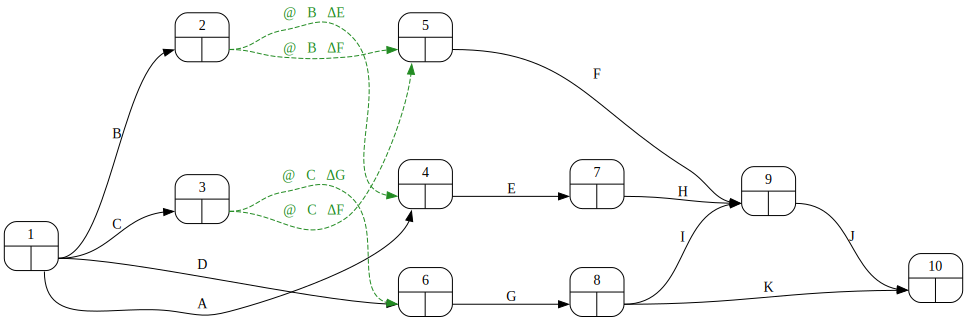

In [10]:
#| fig-cap: "Grafo Pert con indicación de los números de nodos"
#| label: fig-pertNumeracionNodos
proyecto.pert(ranksep=1.5, nodesep=0.8)

### Matriz de Zaderenko

In [11]:
#| tbl-cap: "Matriz de Zaderenko para el cálculo de tiempos tempranos y tardíos"
#| label: tbl-Zaderenko
proyecto.zaderenko(durations=datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,9,10,early
1,,1.0,2.0,3.0,,1.0,,,,,0.0
2,,,,0.0,0.0,,,,,,1.0
3,,,,,0.0,0.0,,,,,2.0
4,,,,,,,3.0,,,,3.0
5,,,,,,,,,5.0,,2.0
6,,,,,,,,1.0,,,2.0
7,,,,,,,,,1.0,,6.0
8,,,,,,,,,3.0,1.0,3.0
9,,,,,,,,,,2.0,7.0
10,,,,,,,,,,,9.0


Los tiempos tempranos y tardios han resultado ser:

In [12]:
#| tbl-cap: "Valores de los tiempos tempranos y tardíos de los nodos"
#| label: tbl-TempranosTardios
resultados_pert = proyecto.calculate_pert(durations=datos_proyecto['duration'])
resultados_pert['nodes']

,early,late
1,0,0
2,1,2
3,2,2
4,3,3
5,2,2
6,2,3
7,6,6
8,3,4
9,7,7
10,9,9


In [13]:
duracion_media_proyecto = int(proyecto.duration(durations=datos_proyecto['duration']))

In [14]:
Markdown(f"La información del nodo final del proyecto nos informa de la duración media del proyecto: {duracion_media_proyecto} periodos")

La información del nodo final del proyecto nos informa de la duración media del proyecto: 9 periodos

### Holguras
A partir de los tiempos tempranos y tardíos, y de las duraciones de las actividades, podemos determinar la holgura total de las actividades y con ellas las rutas del camino crítico.

In [15]:
#| tbl-cap: "Valor de la holgura total de las actividades"
#| label: tbl-htotal
resultados_pert['activities'][['H_total']]

,H_total
@∇B⤑ΔE,2
@∇B⤑ΔF,1
@∇C⤑ΔF,0
@∇C⤑ΔG,1
A,0
B,1
C,0
D,2
E,0
F,0


#### Camino crítico

Las rutas del camino crítico son en este caso:

In [16]:
camino_critico = proyecto.critical_path(durations=datos_proyecto['duration'])
for key, value in camino_critico.items():
    display(Markdown(f"{key}: \t " + ", ".join(value)))

Route_1: 	 A, E, H, J

Route_4: 	 C, F, J

### Calendario del proyecto
Se muestra a continuación el calendario del proyecto, con indicación de las fechas de inicio y fin más tempranas y tardías de cada actividad:

In [17]:
#| tbl-cap: "Calendario del proyecto"
#| label: tbl-calendario
calendario = proyecto.calendar(datos_proyecto['duration'])
calendario

,inicio_mas_temprano,inicio_mas_tardio,fin_mas_temprano,fin_mas_tardio,H_total,duracion
activity,,,,,,
A,0,0,3,3,0,3
B,0,1,1,2,1,1
C,0,0,2,2,0,2
D,0,2,1,3,2,1
E,3,3,6,6,0,3
F,2,2,7,7,0,5
G,2,3,3,4,1,1
H,6,6,7,7,0,1
I,3,4,6,7,1,3


### Grafo PERT con indicación de tiempos y rutas críticas

A continuación se muestra el grafo Pert del proyecto, con indicación de las actividades críticas:

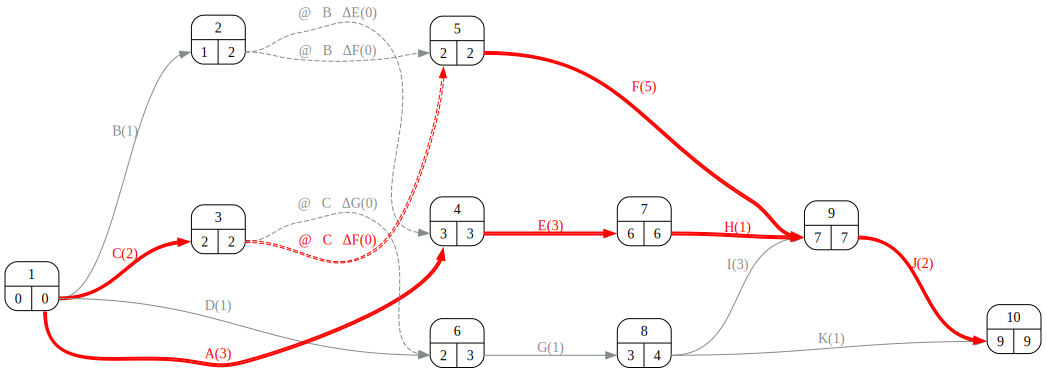

In [18]:
#| fig-cap: "Grafo Pert con indicación del camino crítico"
#| label: fig-pertrutasCriticas
proyecto.pert(durations=datos_proyecto['duration'], ranksep=1.5, nodesep=1)

A continuación se muestra el grafo Roy del proyecto, con indicación de las actividades críticas:

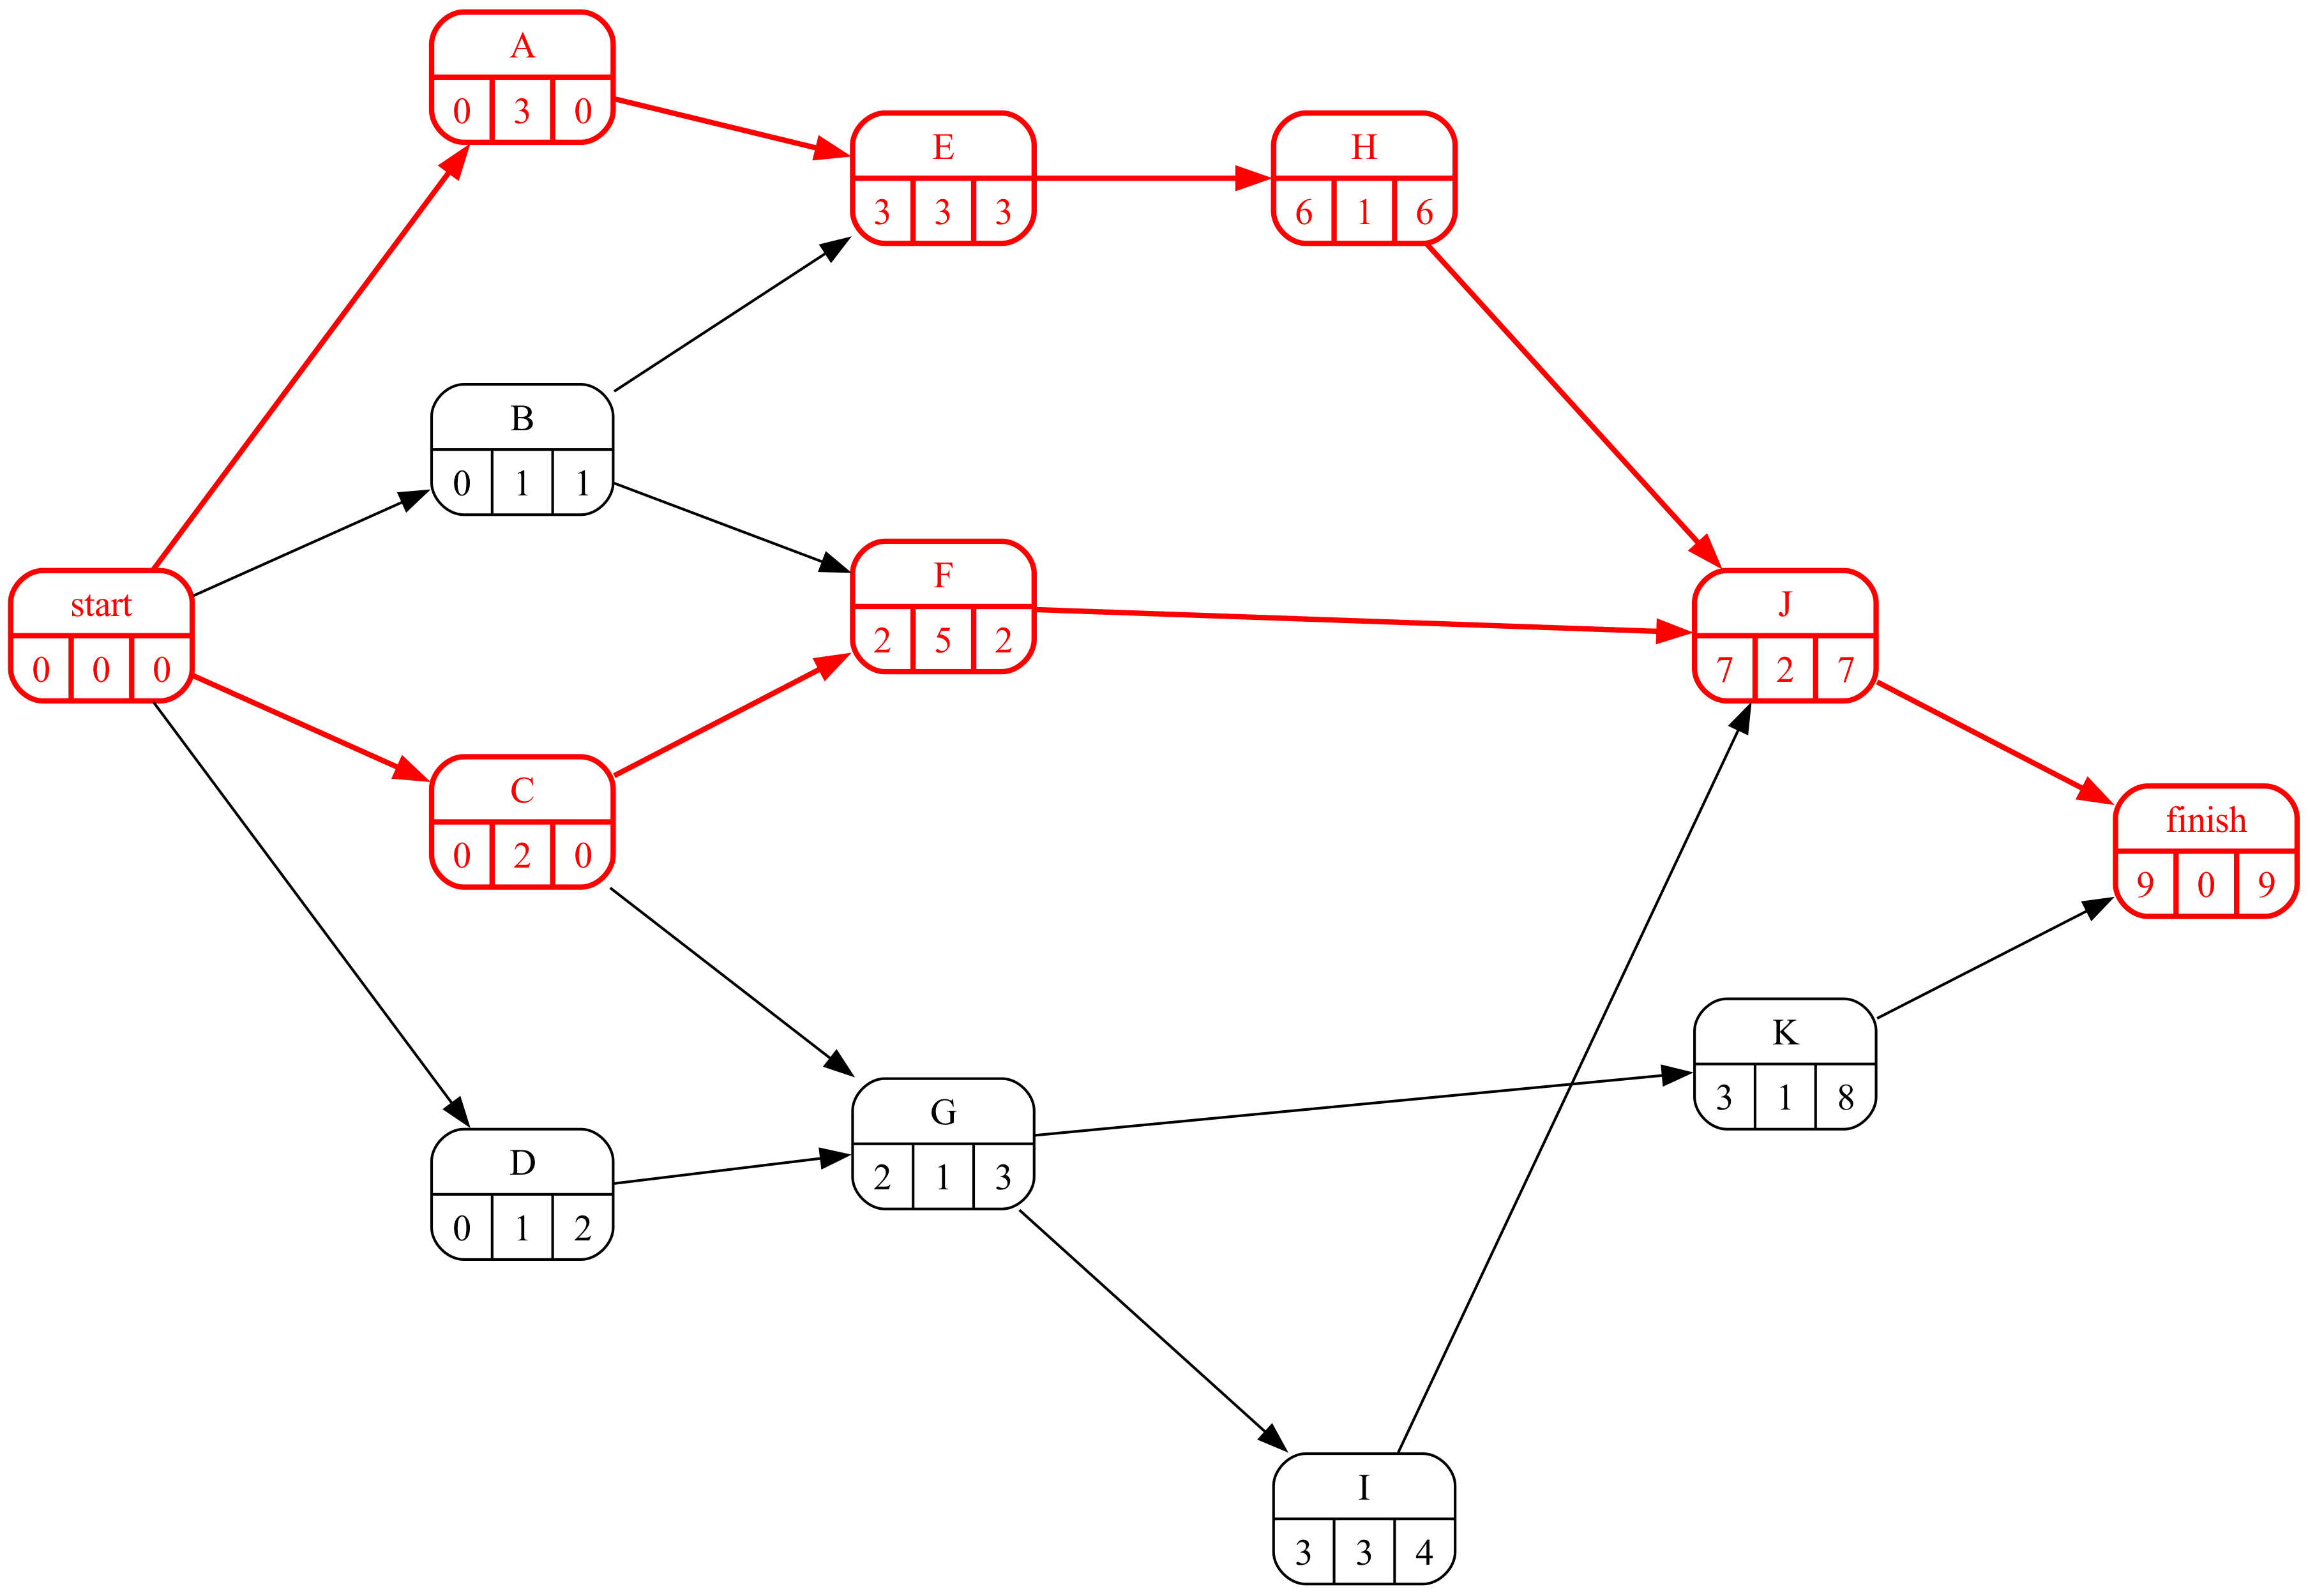

In [19]:
#| fig-cap: "Grafo Roy del proyecto con indicación de las actividades críticas"
#| label: fig-RoyCríticas
proyecto.roy(ranksep=1.25, nodesep=1.25, durations=datos_proyecto['duration'])

### Apartado 2

In [20]:
display(Markdown(pregunta_2))

2. ¿Cuál será la probabilidad de terminar el proyecto entre 10 y 12 periodos. ¿Y la de terminar en 9 periodos?.  

In [21]:
duracion_media_proyecto = proyecto.duration(durations=datos_proyecto['duration'])

In [22]:
Markdown(f"Ya conocemos el valor medio de la duración del proyecto. Es el valor de la duración del proyecto que hemos calculado con duraciones medias de las actividades: {duracion_media_proyecto} periodos")

Ya conocemos el valor medio de la duración del proyecto. Es el valor de la duración del proyecto que hemos calculado con duraciones medias de las actividades: 9 periodos

Para determinar la desviación típica de la duración del proyecto debemos obtener, en cada rama del camino crítico, la suma de las varianzas, y quedarnos con la mayor.

In [23]:
datos_proyecto['variance'] = datos_proyecto.eval('standard_deviation ** 2')
desviacion_proyecto, varianza_caminos = proyecto.standard_deviation(durations=datos_proyecto['duration'],
                                                  variances=datos_proyecto['variance'])

In [24]:
#| tbl-cap: "Varianza de las rutas del camino crítico"
#| label: tbl-varianzaRutas
varianza_caminos

,Activities,Variance
Route_1,"A, E, H, J",7.00
Route_4,"C, F, J",3.00


In [25]:
Markdown(f"El proyecto sigue una distribución normal con media {duracion_media_proyecto} y desviación típica {round(desviacion_proyecto, 2)}.")

El proyecto sigue una distribución normal con media 9 y desviación típica 2.65.

In [26]:
Markdown(f"Al coincidir el valor de la media con una de las duraciones para las que nos piden el valor de la probabilidad, nos permite responder responder sin realizar cálculo alguno que la probabilidad de terminar antes de {duracion_media_proyecto} es del 50%, pues en la distribución normal la media por simetría deja un 50% de casos a cada uno de sus lados.")

Al coincidir el valor de la media con una de las duraciones para las que nos piden el valor de la probabilidad, nos permite responder responder sin realizar cálculo alguno que la probabilidad de terminar antes de 9 es del 50%, pues en la distribución normal la media por simetría deja un 50% de casos a cada uno de sus lados.

In [27]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_b = round(norm.cdf(12, loc=duracion_media_proyecto, scale=desviacion_proyecto), 2)
probabilidad_de_terminar_antes_de_a = round(norm.cdf(10, loc=duracion_media_proyecto, scale=desviacion_proyecto), 2)
probabilidad_de_terminar_entre_a_y_b = round(probabilidad_de_terminar_antes_de_b - probabilidad_de_terminar_antes_de_a, 2)

In [28]:
Markdown(f"""Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad de terminar entre los periodos {periodo_probabilidad_a} y {periodo_probabilidad_b}.  
- La probabilidad de terminar antes de {periodo_probabilidad_a} periodos es  {probabilidad_de_terminar_antes_de_a}  
- La probabilidad de terminar antes de {periodo_probabilidad_b} periodos es {probabilidad_de_terminar_antes_de_b}  

Por tanto, a partir de la diferencia de estos dos valores tenemos la probabilidad de terminar dentro del mencionado intervalo: {int(probabilidad_de_terminar_entre_a_y_b*100)} por ciento.
""")

Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad de terminar entre los periodos 10 y 12.  
- La probabilidad de terminar antes de 10 periodos es  0.65  
- La probabilidad de terminar antes de 12 periodos es 0.87  

Por tanto, a partir de la diferencia de estos dos valores tenemos la probabilidad de terminar dentro del mencionado intervalo: 22 por ciento.


### Apartado 3.


In [29]:
display(Markdown(pregunta_3))

3. Como no está conforme con la duración del proyecto que resulta, desea reducir la duración del proyecto en 2 periodos con el mínimo incremento de coste posible. ¿Qué tareas deben ser reducidas?. Razónese.  

Aplicamos en este apartado el algoritmo de Ackoff y Sasieni para la reducción del proyecto con mínimo incremento de coste:

In [30]:
ackoff, best_option, duration, available = proyecto.ackoff(durations=datos_proyecto['duration'],
                                                           min_durations=datos_proyecto['cap_duration'],
                                                           costs=datos_proyecto['ucr'],
                                                           reduction=2
                                                           )

In [31]:
#| tbl-cap: "Cuadro del algoritmo de Ackoff Sasieni"
#| label: tbl-ackoffƒ
ackoff

,A,B,C,D,E,F,G,H,I,J,K,0,1,2
Route_1,25.0,,,,10.0,,,5.0,,5.0,,9.0,8.0,7.0
Route_2,,20.0,,,10.0,,,5.0,,5.0,,7.0,6.0,5.0
Route_3,,20.0,,,,25.0,,,,5.0,,8.0,7.0,7.0
Route_4,,,7.0,,,25.0,,,,5.0,,9.0,8.0,7.0
Route_5,,,7.0,,,,30.0,,50.0,5.0,,8.0,7.0,6.0
Route_6,,,7.0,,,,30.0,,,,10.0,4.0,4.0,3.0
Route_7,,,,25.0,,,30.0,,50.0,5.0,,7.0,6.0,6.0
Route_8,,,,25.0,,,30.0,,,,10.0,3.0,3.0,3.0
0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,,,
1,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,,,


Las actividades a recortar en cada iteración son:

In [32]:
for iteracion, actividades in best_option.items():
    display(Markdown(f"- Iteración {iteracion}: " + ", ".join(actividades) + "<br>"))

- Iteración 0: J<br>

- Iteración 1: C, E<br>

### Apartado 4

In [33]:
display(Markdown(pregunta_4))

4. Debido a que la empresa está realizando otros dos proyectos al mismo tiempo, la disponibilidad de mano de obra no es todo lo grande que sería de desear, por lo que en las cinco primeras semanas sólo se puede contar con 10 operarios.  
    - ¿Se encuentra bien nivelado el recurso “mano de obra”?.  ¿Por qué?.
    - ¿Se encuentra bien asignado este recurso?. ¿Por qué?.
    - En caso de que no estuvieran bien asignados, proponer una posible modificación de la planificación de las tareas para una correcta asignación.  

In [34]:
proyecto_asignacion = proyecto.copy()

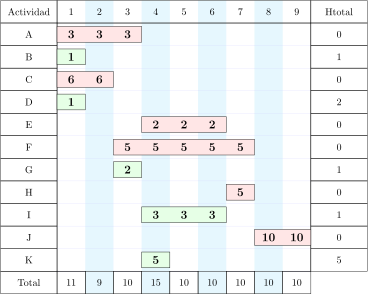

In [35]:
#| fig-cap: "Distribución inicial del consumo de recursos"
#| label: fig-recursosInicial
gantt_recursos, dibujo = proyecto_asignacion.gantt(datos_proyecto,
                                'duration',
                                'resources',
                                total='fila',
                                holguras=True,
                                tikz=True)
pinta_tikz(dibujo)

La fila "Total" obtenida, que podemos representar gráficamente en la siguiente figura, proporciona la información del consumo previsto de recursos a lo largo del tiempo.

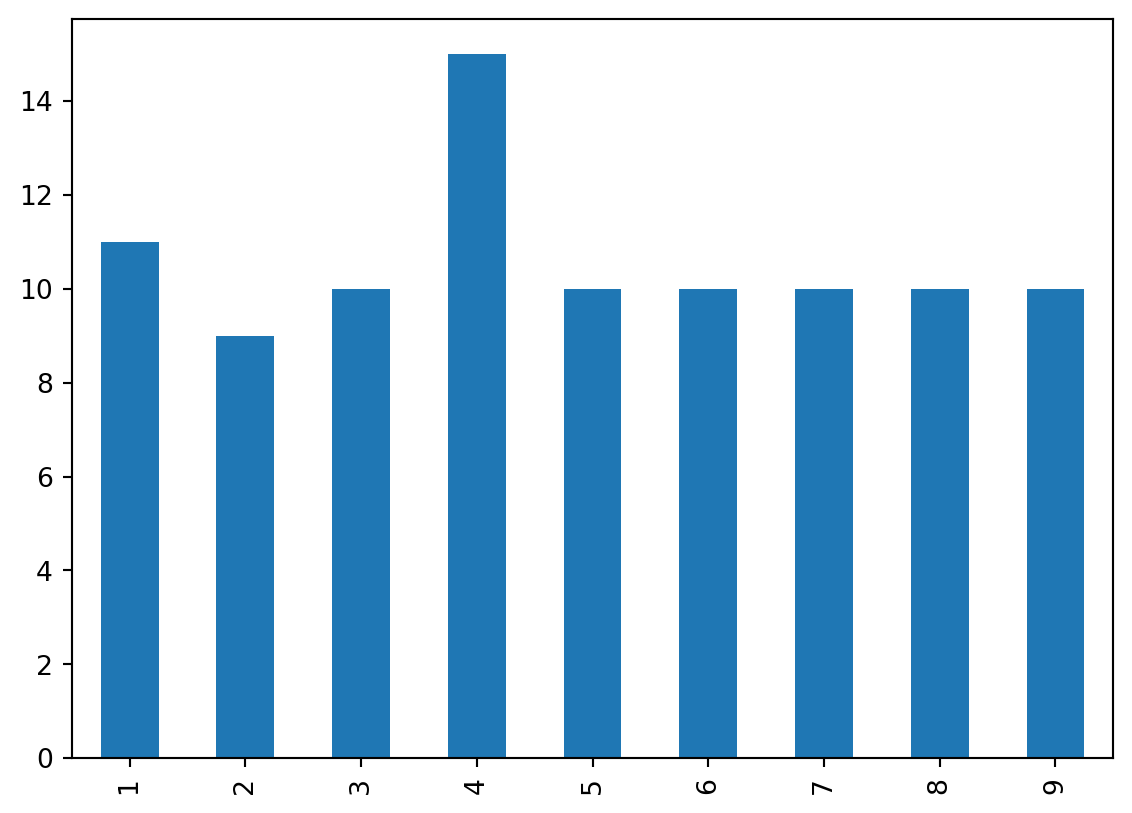

In [36]:
#| fig-cap: "Diagrama de cargas antes de aplicar el algoritmo de asignación"
#| label: fig-preAsignacionBarras
(gantt_recursos.data.loc['Total'].drop('H_total').plot(kind='bar'));

La demanda del recurso no se encuentra nivelada.
Además, con el máximo disponible de 10 recursos durante los primeros 5 periodos el proyecto no es ejecutable en su estado actual y debe aplicarse el algoritmo de asignación.

#### Algoritmo de asignación

In [37]:
duracion_y_recursos = datos_proyecto[['duration', 'resources']]
gantt_df, dibujo  = proyecto_asignacion.asignar(
                                    data=duracion_y_recursos,
                                    duration_label='duration',
                                    resource_label='resources',
                                    maximo=[10]*5 + [100],
                                    report=False
                                    )

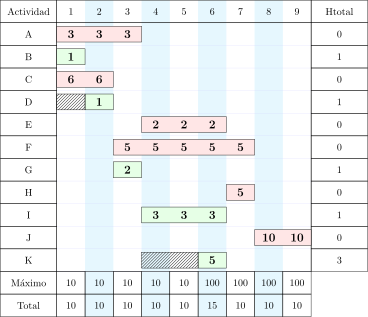

In [38]:
#| fig-cap: "Diagrama de Gantt del proyecto una vez aplicado el algoritmo de asignación"
#| label: fig-postAsignacion
pinta_tikz(dibujo)

En esta situación el proyecto ya es realizable por haberse impuesto el límite de recursos tan sólo en los primeros 5 periodos. La ausencia de límite en el resto de periodos se ha resuelto estableciendo un límite de 100 recursos, que no llega a superarse, para el resto del proyecto.

En este caso concreto, la duración del proyecto no ha cambiado tras la asignación, ni han aparecido nuevas rutas en el camino crítico:

In [39]:
proyecto.display_critical_path(durations=duracion_y_recursos['duration'])

- Route_1 :	A, E, H, J <br> 

- Route_4 :	C, F, J <br> 

No obstante, sí ha disminuido la holgura total de las actividades.